In [1]:
# linear regression = demand prediction model
import pandas as pd
import numpy as np

In [2]:
Combined = pd.read_csv('combined_detail_cleaned.csv',encoding= 'ISO-8859-1')

In [3]:
#Get the value of the feature labels
FEATURES = list(Combined.columns.values)

In [4]:
# Analyse the correlations between max_total_demand with other numerical features, pick the features with abs correlation over 0.3
correlation_table = Combined[FEATURES].corr(method='pearson')
Possible_features = list(correlation_table.loc[abs(correlation_table['max_total_demand']) > 0.3].index)
Possible_features.remove('max_total_demand')
display(correlation_table)
print(f'Possible features are {Possible_features}')

,max_total_demand,temperature_min,temperature_max,rainfall,evaporation,sunshine,max_wind_speed,temperature_9am,humidity_9am,cloud_9am,wind_speed_9am,pressure_9am,temperature_3pm,humidity_3pm,cloud_3pm,wind_speed_3pm,pressure_3pm
max_total_demand,1.000000,-0.499240,-0.298917,-0.077924,-0.264008,-0.139581,0.062905,-0.401323,0.100780,-0.167373,0.103332,0.056719,-0.325252,0.064301,0.069117,-0.040639,0.000637
temperature_min,-0.499240,1.000000,0.709815,0.049109,0.656471,0.075019,0.069555,0.916641,-0.328869,0.214431,0.009621,-0.327108,0.666270,-0.053574,0.064745,-0.017485,-0.295339
temperature_max,-0.298917,0.709815,1.000000,-0.120518,0.622720,0.463268,-0.042416,0.821321,-0.306590,-0.163157,-0.064219,-0.104030,0.968313,-0.454434,-0.237145,-0.024936,-0.185833
rainfall,-0.077924,0.049109,-0.120518,1.000000,-0.041847,-0.149117,0.048008,-0.015488,0.192910,0.072033,-0.068970,-0.138399,-0.122995,0.193617,0.113705,0.049875,-0.059675
evaporation,-0.264008,0.656471,0.622720,-0.041847,1.000000,0.273256,0.167781,0.707249,-0.527245,0.014322,0.126923,-0.274960,0.560214,-0.208511,-0.094485,0.022986,-0.256634
sunshine,-0.139581,0.075019,0.463268,-0.149117,0.273256,1.000000,-0.055018,0.190590,-0.238653,-0.596661,-0.002699,0.209184,0.487546,-0.550315,-0.724010,0.091350,0.138389
max_wind_speed,0.062905,0.069555,-0.042416,0.048008,0.167781,-0.055018,1.000000,0.123274,-0.387424,0.027791,0.608051,-0.425712,-0.083784,-0.078598,0.132051,0.679660,-0.441281
temperature_9am,-0.401323,0.916641,0.821321,-0.015488,0.707249,0.190590,0.123274,1.000000,-0.462847,0.079121,0.047180,-0.286810,0.765603,-0.155389,0.000386,0.027211,-0.295381
humidity_9am,0.100780,-0.328869,-0.306590,0.192910,-0.527245,-0.238653,-0.387424,-0.462847,1.000000,0.064782,-0.478281,0.145228,-0.259716,0.402332,0.027701,-0.230632,0.147110
cloud_9am,-0.167373,0.214431,-0.163157,0.072033,0.014322,-0.596661,0.027791,0.079121,0.064782,1.000000,-0.010509,-0.202276,-0.181595,0.424203,0.395680,0.002685,-0.132591


Possible features are ['temperature_min', 'temperature_9am', 'temperature_3pm']


In [5]:
#Check the correlations between these possible features
Independent_correlation_table = Combined[Possible_features].corr(method='pearson')
Independent_correlation_table

,temperature_min,temperature_9am,temperature_3pm
temperature_min,1.000000,0.916641,0.666270
temperature_9am,0.916641,1.000000,0.765603
temperature_3pm,0.666270,0.765603,1.000000


In [6]:
#Prepare the possible features label and output label again
Possible_features.append('max_total_demand')
#Analysis the correlation relationship between output and filtered features
Combined[Possible_features].corr(method='pearson')

,temperature_min,temperature_9am,temperature_3pm,max_total_demand
temperature_min,1.000000,0.916641,0.666270,-0.499240
temperature_9am,0.916641,1.000000,0.765603,-0.401323
temperature_3pm,0.666270,0.765603,1.000000,-0.325252
max_total_demand,-0.499240,-0.401323,-0.325252,1.000000


Final selected features for model is['temperature_min']


<AxesSubplot:ylabel='Frequency'>

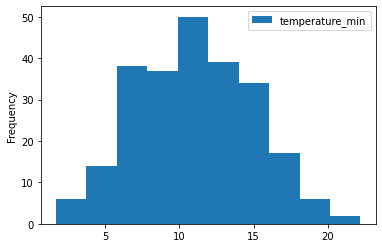

In [10]:
# Since all possible features are self correlated, then just pick the one with highest correlation with output
Final_features = list(correlation_table.loc[abs(correlation_table['max_total_demand']) > 0.45].index)
Final_features.remove('max_total_demand')
print(f'Final selected features for model is{Final_features}')
Combined[Final_features].plot.hist()

In [11]:
#Set the features and output into X , y
X = Combined[Final_features]
y = Combined['max_total_demand']

Model y = [-101.69981062]['temperature_min'] +  7249.187482889431, the r2_score is 0.43
Model y = [-106.3542867]['temperature_min'] +  7309.948090823939, the r2_score is 0.17
Model y = [-102.05459822]['temperature_min'] +  7262.257867027095, the r2_score is 0.50
Model y = [-116.08636217]['temperature_min'] +  7387.316841505899, the r2_score is -0.22
Model y = [-103.98205037]['temperature_min'] +  7299.45821867839, the r2_score is 0.15
Model y = [-99.65731555]['temperature_min'] +  7255.538417858015, the r2_score is 0.32
Model y = [-102.52610466]['temperature_min'] +  7260.16182581277, the r2_score is 0.39
Model y = [-104.22949405]['temperature_min'] +  7308.045016069817, the r2_score is 0.18
Model y = [-100.34622687]['temperature_min'] +  7246.4472484911785, the r2_score is 0.39
Model y = [-110.88976934]['temperature_min'] +  7351.77731728902, the r2_score is -0.04
Average score is 0.23
r2 score experimental result: ['0.43', '0.17', '0.50', '-0.22', '0.15', '0.32', '0.39', '0.18', '0.3

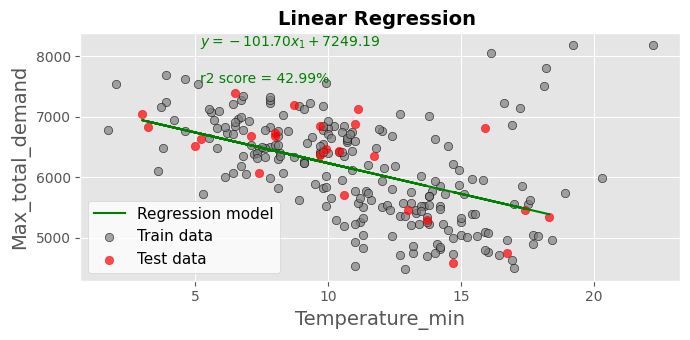

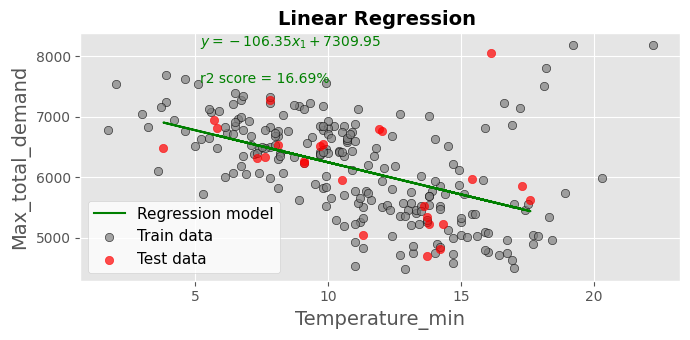

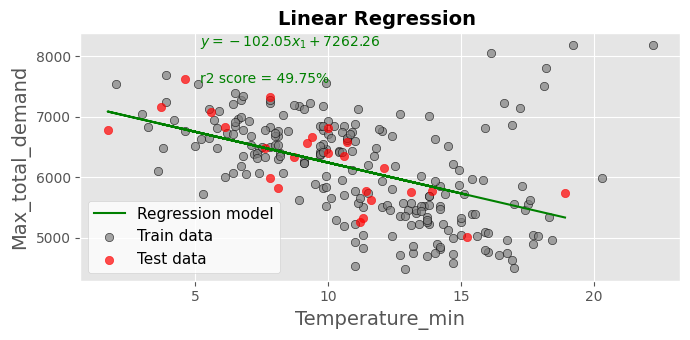

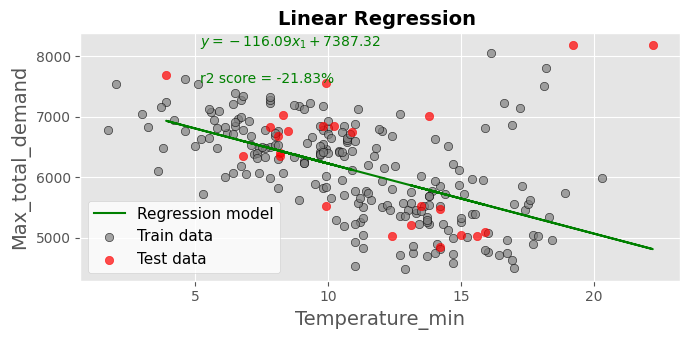

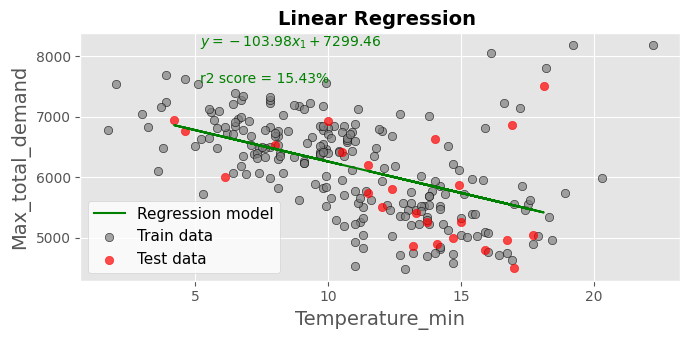

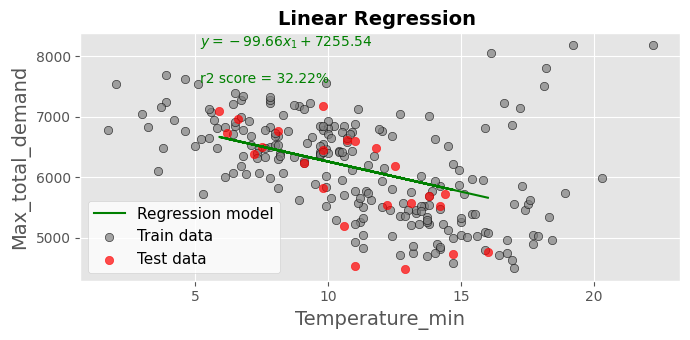

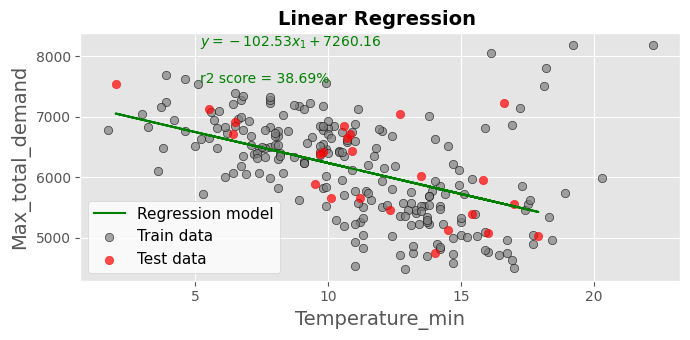

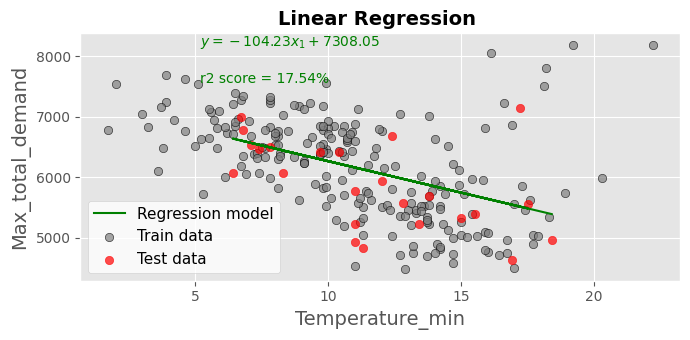

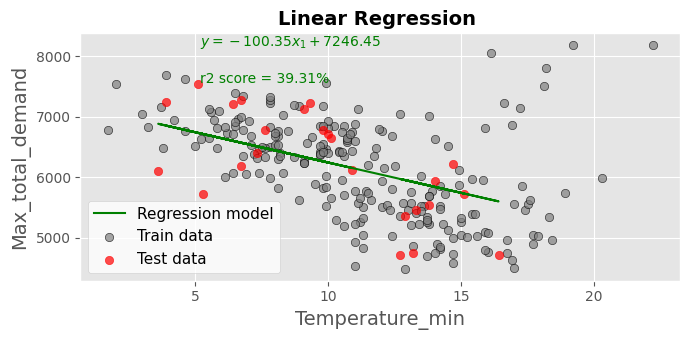

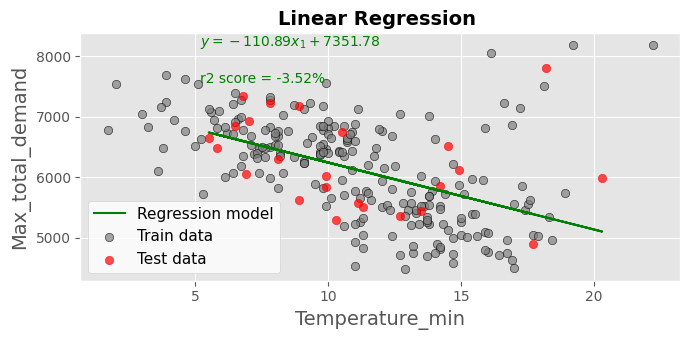

In [34]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# K-fold Method (cross validation) 
k=10
kf = KFold(n_splits=k, shuffle=True, random_state=40)
R2_score = []

# Implementation of K-fold Method
for train_index, test_index in kf.split(X):
    # Split Training and Test sets
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]   
    
    # Step 1: Instantiate 
    lm = linear_model.LinearRegression()
    
    # Step 2: Fit
    lm.fit(X_train, y_train)
    #print(lm.coef_,lm.intercept_)
    # Step 3: Predict
    y_pred = lm.predict(X_test)  
    
    
    # Step 4: Evaluate
    R2_score.append(r2_score(y_test, y_pred))
    
    print(f'Model y = {lm.coef_}{Final_features} +  {lm.intercept_}, the r2_score is {r2_score(y_test, y_pred):.2f}')
    
    #Plot the linear regression model
    plt.style.use('default')
    plt.style.use('ggplot')

    fig, ax = plt.subplots(figsize=(7, 3.5))
    ax.text(0.2, 0.95, '$y = %.2f x_1 + %.2f $' % (lm.coef_[0], abs(lm.intercept_)), fontsize=10, color='g', fontweight ='bold', transform=ax.transAxes)
    ax.text(0.2, 0.8, f'r2 score = {100 * r2_score(y_test, y_pred):.2f}%' , fontsize=10, color='g', transform=ax.transAxes)
    ax.plot(X_test, y_pred, color='green', label='Regression model')
    ax.scatter(X_train, y_train, edgecolor='k', facecolor='grey', alpha=0.7, label='Train data')
    ax.scatter(X_test, y_test, edgecolor='r', facecolor='r', alpha=0.7, label='Test data')
    ax.set_ylabel('Max_total_demand', fontsize=14)
    ax.set_xlabel('Temperature_min', fontsize=14)
    ax.legend(facecolor='white', fontsize=11)
    ax.set_title('Linear Regression ', fontsize = 14, fontweight ='bold')
    fig.tight_layout()


print(f'Average score is {sum(R2_score)/k:.2f}')
R2_score = [ '%.2f' % elem for elem in R2_score ]
print(f'r2 score experimental result: {R2_score}')